# CEDAR Handbook
### Author: Jack Sanders

In [29]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
plt.style.use(hep.style.NA62)
plt.rc('legend',fontsize=12)
import CEDAR_Parameters as Cpm
importlib.reload(Cpm)

<module 'CEDAR_Parameters' from 'c:\\Users\\sande\\Documents\\Coding\\NA62_CEDARH_Handbook\\CEDAR_Parameters.py'>

In [30]:
filename = "Cedar_data/data.comb.3.txt"
verbose_level = 1 # 0 no printout, 1 printout to console, 2 printout to text file
CEDARH = Cpm.CEDARH()
print("!")

!


In [31]:
def ELConvert(value):
  return  1.239841 / value

In [4]:
events = []
splitted = []
eventno = 0
with open(filename,"r") as f:
    for line in f:
        if "=" in line.split(",")[0]:
            events.append(splitted)
            splitted = []
            if eventno == 1000:
                break
            print(eventno, end="\r")
            eventno += 1
            continue
        splitted.append(line.split(","))

0
Events: 1129
###################################
Number of Photons hitting PMT: 0
Number of Photons hitting QW: 0
Number of Photons absorbed by QW: 0
Number of Photons hitting Diaphragm: 551
Number of Photons absorbed by Diaphragm: 0
Number of Photons hitting CromCor: 0
Number of Photons absorbed by CromCor: 0
Number of Photons hitting ManginMirror: 676
Number of Photons absorbed by ManginMirror: 95
###################################
Production: Min z position = 70198.5009 and Max z position 75297.6762
Production: Total number of cherenkov photons = 1003
Production: Number of cherenkov photons per m = 196.69847396695687
1
Events: 1136
###################################
Number of Photons hitting PMT: 0
Number of Photons hitting QW: 0
Number of Photons absorbed by QW: 0
Number of Photons hitting Diaphragm: 536
Number of Photons absorbed by Diaphragm: 0
Number of Photons hitting CromCor: 1
Number of Photons absorbed by CromCor: 0
Number of Photons hitting ManginMirror: 680
Number of P

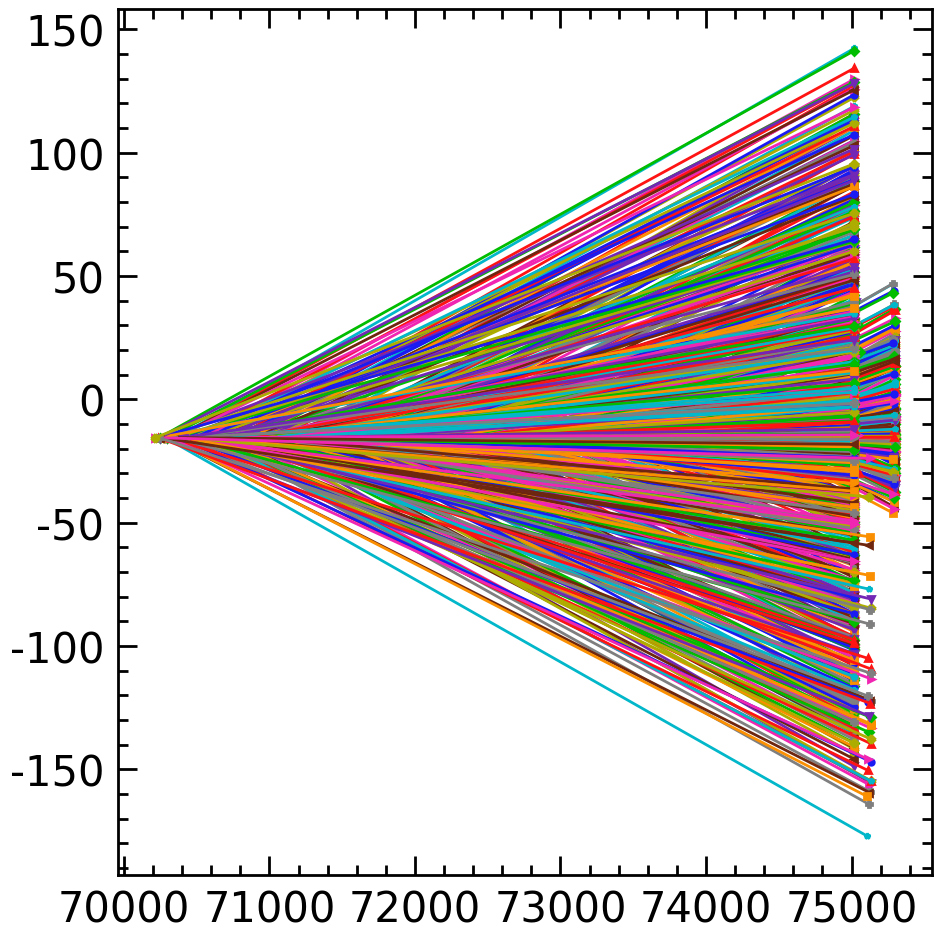

In [75]:
count_z = []  
waves = []

_pmts = 0
_QW_L = 0
_QW = 0
_dia_L = 0
_dia = 0
_crom_L = 0
_crom = 0
_mang = 0
_mang_L = 0
_mang_p = 0 

mang_hit_Waves = []
mang_ref_Waves = []

crom_hit = []
crom_hit_back = []
crom_hit_for = []
crom_trans = []

crom_F1_hit = []
crom_F1_trans = []
crom_F1_for = []
crom_F1_tran_for = []
crom_F1_refl = []

crom_F2_hit = []
crom_F2_refl = []


angle  = []
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
wave_start = []

condensor_hit = [ [] for i in range(8)]
condensor_trans = [ [] for i in range(8)]

CedarDiaphragmGap_R = []
CedarDiaphragm_R = []

QW_hit = [ [] for i in range(8)]
QW_Trans = [ [] for i in range(8)]

SM_hit = [ [] for i in range(8)]
SM_Trans = [ [] for i in range(8)]

for t in range(len(events)):  
    max_ = 0
    min_ = 9999999
    count=0
    try:
        test = [None]*(int(events[t][0][5])+1)
    except IndexError:
        continue
    x_vals = [None]*2000 #(int(events[t][0][5])+1)
    y_vals = [None]*2000 #(int(events[t][0][5])+1)
    z_vals = [None]*2000 #(int(events[t][0][5])+1)
    color = [None]*2000 #(int(events[t][0][5])+1)
    _x = []
    _y = []
    _z = []
    previd = -99
    
    pmts = 0
    QW_L = 0
    QW = 0
    dia_L = 0
    dia = 0
    crom_L = 0
    crom = 0
    mang = 0
    mang_L = 0
    mang_p = 0
    
    prevfinvol = ""
    prev_prevvol = "" 
    
    print(t)
    print("Events: " + str(int(events[t][0][5])+1))
    
    for i in range(len(events[t])):
        z = float(events[t][i][2])
        e = float(events[t][i][9])
        x = float(events[t][i][0])
        y = float(events[t][i][1])
        x1 = float(events[t][i][10])
        y1 = float(events[t][i][11])
        z1 = float(events[t][i][12])
        _id = int(events[t][i][5])
        prevol = str(events[t][i][7])
        finvol = str(events[t][i][13])
        waves.append(ELConvert(e*1e6)*1e3)
        #print(events[t][i][13])
        
        if "CedarOctant" in prevol and "CedarSphericalMirror" in finvol:
            SM_hit[int(finvol[-1])-1].append(ELConvert(e*1e6)*1e3)
            
        if "CedarSphericalMirror" in prevol and "CedarOctant" in finvol:
            SM_hit[int(finvol[-1])-1].append(ELConvert(e*1e6)*1e3)
        
        if "CedarDiaphragmGap" in prevol:
            CedarDiaphragmGap_R.append(np.sqrt(x**2+y**2))
            
        if "CedarRadiatorGas" in prevol and "CedarDiaphragm" in finvol:
            CedarDiaphragm_R.append(np.sqrt(x**2+y**2))
        
        if "CedarRadiatorGas" in prevol and "CedarQuartzWindow" in finvol:
            QW_hit[int(finvol[-1])-1].append(ELConvert(e*1e6)*1e3)
            QW += 1
            
        if "CedarQuartzWindow" in prevol and "CedarOctant" in finvol:
            QW_Trans[int(prevol[-1])-1].append(ELConvert(e*1e6)*1e3)
            
        if "CedarDiaphragm" in finvol:
            dia += 1
            
        if "CedarRadiatorGas" in prevol and finvol == "CedarChromaticCorrector":
            crom_hit.append(ELConvert(e*1e6)*1e3)
            crom +=1
            if z > z1:
                crom_hit_back.append(ELConvert(e*1e6)*1e3)
            else:
                crom_hit_for.append(ELConvert(e*1e6)*1e3)
        
        if "CedarRadiatorGas" in prevol and "CedarCondenser" in finvol:
            condensor_hit[int(finvol[-1])-1].append(ELConvert(e*1e6)*1e3)
            
        ###############################################################################
        ##                              Chromatic Corrector                          ##
        
        if prevol == "CedarChromaticCorrector" and finvol == "CedarChromaticF1Surface":   
            crom_trans.append(ELConvert(e*1e6)*1e3)
            
        if prevol == "CedarChromaticCorrector" and finvol == "CedarChromaticF1Surface":
            if z < z1:
                print("yes")
            crom_F1_hit.append(ELConvert(e*1e6)*1e3)
            
        if prevol == "CedarChromaticF1Surface" and finvol == "CedarChromaticCorrector":
            crom_F1_for.append(ELConvert(e*1e6)*1e3)
        
        if prevol == "CedarChromaticF1Surface" and finvol == "CedarRadiatorGas":
            crom_F1_trans.append(ELConvert(e*1e6)*1e3)    
        
        if prev_prevvol == "CedarChromaticF1Surface" and prevfinvol == "CedarChromaticCorrector" and prevol == "CedarChromaticCorrector" and finvol == "CedarChromaticF1Surface":
            crom_F1_refl.append(ELConvert(e*1e6)*1e3)
            
        if prevol == "CedarRadiatorGas" and finvol == "CedarChromaticF2Surface":
            crom_F2_hit.append(ELConvert(e*1e6)*1e3)    
        
        if prev_prevvol == "CedarChromaticF2Surface" and prevfinvol == "CedarChromaticCorrector" and prevol == "CedarChromaticCorrector" and finvol == "CedarChromaticF2Surface":
            crom_F2_refl.append(ELConvert(e*1e6)*1e3)
            
        ###############################################################################
        ##                              -------------------                          ##
            
        if "CedarCondenser" in prevol and finvol == "CedarRadiatorGas":   
            condensor_trans[int(prevol[-1])-1].append(ELConvert(e*1e6)*1e3)
                    
        #if prevol == "CedarRadiatorGas" and finvol == "CedarManginMirrorLens":
        if prevol == "CedarManginMirrorLens" and finvol == "CedarManginMirrorCoating": 
            mang_hit_Waves.append(ELConvert(e*1e6)*1e3)
            mang += 1
        
        #if prevol == "CedarManginMirrorLens" and finvol == "CedarRadiatorGas":
        if prevol == "CedarManginMirrorCoating" and finvol == "CedarManginMirrorLens":
            mang_p += 1
            mang_ref_Waves.append(ELConvert(e*1e6)*1e3)
            
        if previd != _id and "CedarRadiatorGas" in prevol:
            data_x = [x,x1]
            data_y = [y,y1]
            data_z = [z,z1]
            
            wave_start.append(ELConvert(e*1e6)*1e3)
            
            #ax01.plot(data_y,data_x)
            if t==1:
                ax.plot(data_z,data_x)
                
            dist_x = x1-x
            dist_z = z1-z
            if (dist_z > 0):
                angle.append(np.arctan(dist_x/dist_z))
        
            #print(z)
            count+=1
            if z > max_:
                max_ = z
            if z < min_:
                min_ = z
            
         
        if previd == _id:
            _x.append(x)
            _x.append(x1)
            _y.append(y)
            _y.append(y1)
            _z.append(z)
            _z.append(z1)
        else:
            #if previd != -99:
                #print(previd)
                #try:
                #    x_vals[previd] = _x
                #except IndexError:
                #    print(previd)
                #    exit()
                #y_vals[previd] = _y
                #print(_z)
                #z_vals[previd] = _z
                #print(finvol)
                #if prevfinvol == "CedarExitWindow":
                #    color[previd] = "red"
                #elif "CedarPMT" in prevfinvol:
                #    pmts += 1
                #    color[previd] = "green"
                #elif "CedarQuartzWindow" in prevfinvol:
                #    QW_L += 1
                #    color[previd] = "blue"
                ##elif "CedarManginMirrorLens" in prevfinvol:
                #color[previd] = "pink"
                #elif prevfinvol == "CedarDiaphragm":
                #    dia_L += 1
                #    color[previd] = "purple"
                #elif prevfinvol == "CedarVessel":
                #    color[previd] = "olive"
                #elif prevfinvol == "CedarChromaticCorrector":
                #    crom_L += 1
                #    color[previd] = "brown"
                #else:
                #    color[previd] = "black"
                
            _x = []
            _y = []
            _z = []
            _x.append(x)
            _x.append(x1)
            _y.append(y)
            _y.append(y1)
            _z.append(z)
            _z.append(z1)
            
        previd = _id
        prevfinvol = finvol
        prev_prevvol = prevol
    
    _pmts += pmts 
    _QW_L += QW_L
    _QW += QW
    _dia_L += dia_L
    _dia += dia
    _crom_L += crom_L
    _crom += crom
    _mang += mang
    _mang_L += mang_L
    _mang_p += mang_p
         
    diff = (max_-min_)/1000
    if count/diff < 100:
        continue
    count_z.append(count/diff)
    
    if (verbose_level == 1):
        print("###################################")
        print("Number of Photons hitting PMT: {}".format(pmts))
        print("Number of Photons hitting QW: {}".format(QW))
        print("Number of Photons absorbed by QW: {}".format(QW_L))
        print("Number of Photons hitting Diaphragm: {}".format(dia))
        print("Number of Photons absorbed by Diaphragm: {}".format(dia_L))
        print("Number of Photons hitting CromCor: {}".format(crom))
        print("Number of Photons absorbed by CromCor: {}".format(crom_L))
        print("Number of Photons hitting ManginMirror: {}".format(mang))
        print("Number of Photons absorbed by ManginMirror: {}".format(mang-mang_p))
        print("###################################")
        print("Production: Min z position = {} and Max z position {}".format(min_,max_))  
        print("Production: Total number of cherenkov photons = {}".format(count))
        print("Production: Number of cherenkov photons per m = {}".format(count/diff))
if (verbose_level == 1):    
    print("###################################")
    print("##############Avg##################")
    print("Number of Photons hitting PMT: {}".format(_pmts/len(events)))
    print("Number of Photons hitting QW: {}".format(_QW/len(events)))
    print("Number of Photons absorbed by QW: {}".format(_QW_L/len(events)))
    print("Number of Photons hitting Diaphragm: {}".format(_dia/len(events)))
    print("Number of Photons absorbed by Diaphragm: {}".format(_dia_L/len(events)))
    print("Number of Photons hitting CromCor: {}".format(_crom/len(events)))
    print("Number of Photons absorbed by CromCor: {}".format(_crom_L/len(events)))
    print("Number of Photons hitting ManginMirror: {}".format(_mang/len(events)))
    print("Number of Photons absorbed by ManginMirror: {}".format((_mang-_mang_p)/len(events)))

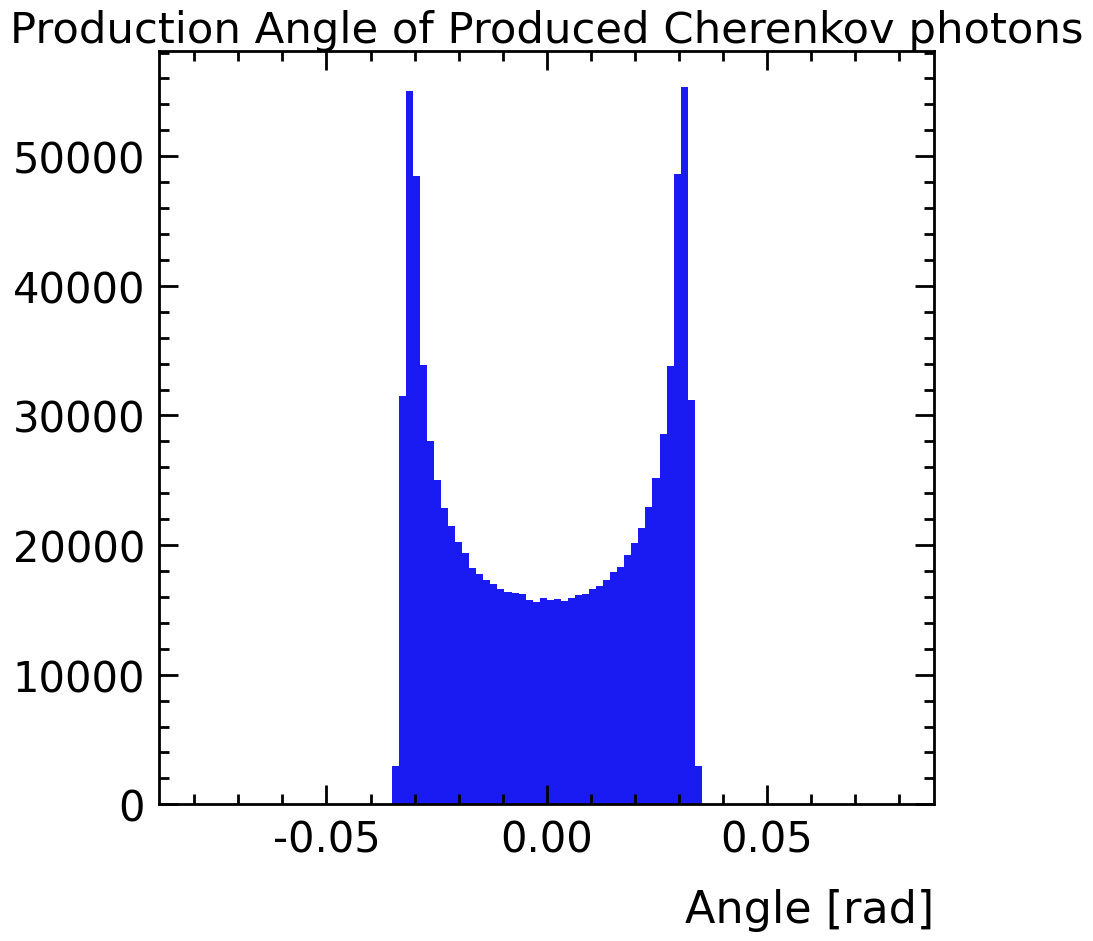

In [7]:
fig101, ax101 = plt.subplots(1, 1, figsize=(10, 10))
ax101.hist(angle,bins=100,range=(-0.08,0.08))
ax101.set_title("Production Angle of Produced Cherenkov photons")
ax101.set_xlabel("Angle [rad]")
plt.show()

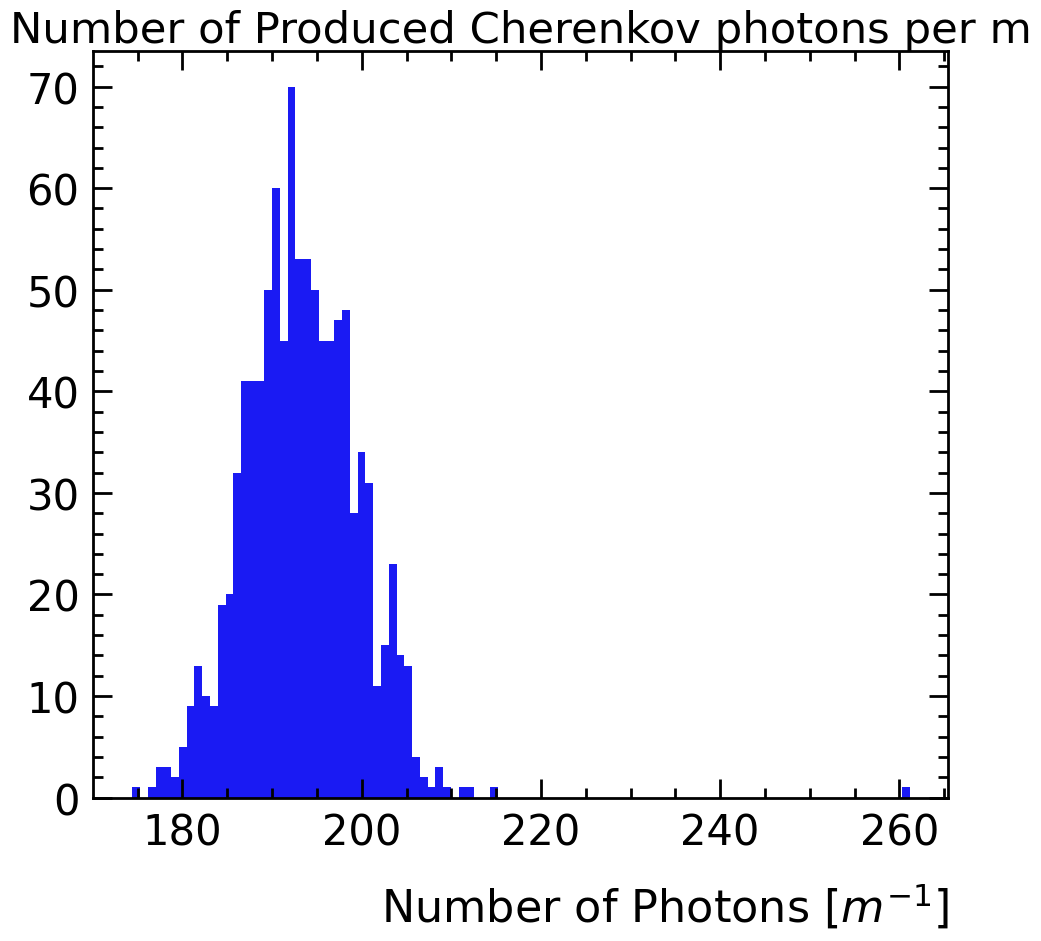

In [8]:
fig102, ax102 = plt.subplots(1, 1, figsize=(10, 10))
ax102.hist(count_z,bins=100)
ax102.set_title("Number of Produced Cherenkov photons per m")
ax102.set_xlabel("Number of Photons [$m^{-1}$]")
plt.show()

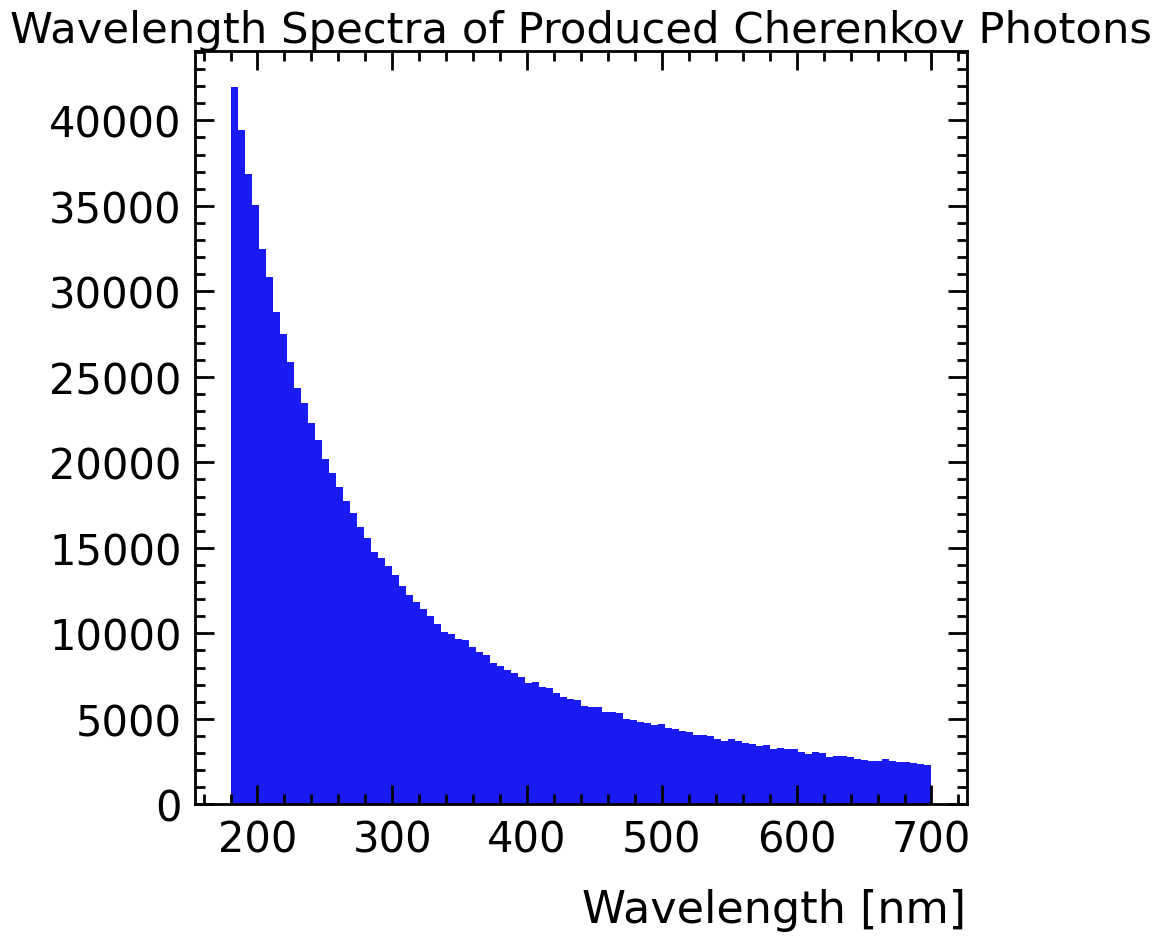

In [73]:

fig103, ax103 = plt.subplots(1, 1, figsize=(10, 10))
ax103.hist(wave_start,bins=100)
ax103.set_title("Wavelength Spectra of Produced Cherenkov Photons")
ax103.set_xlabel("Wavelength [nm]")
plt.show()

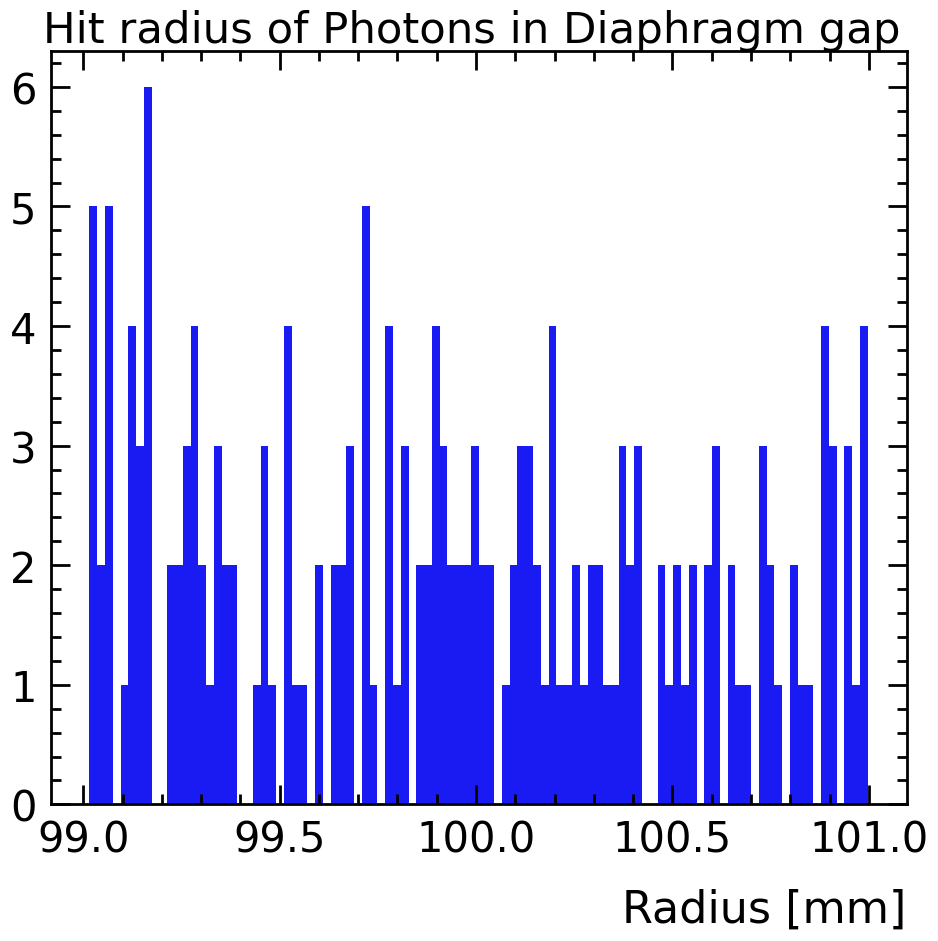

In [74]:
fig104, ax104 = plt.subplots(1, 1, figsize=(10, 10))
ax104.hist(CedarDiaphragmGap_R, bins=100)
ax104.set_xlabel("Radius [mm]")
ax104.set_title("Hit radius of Photons in Diaphragm gap ")
plt.show()

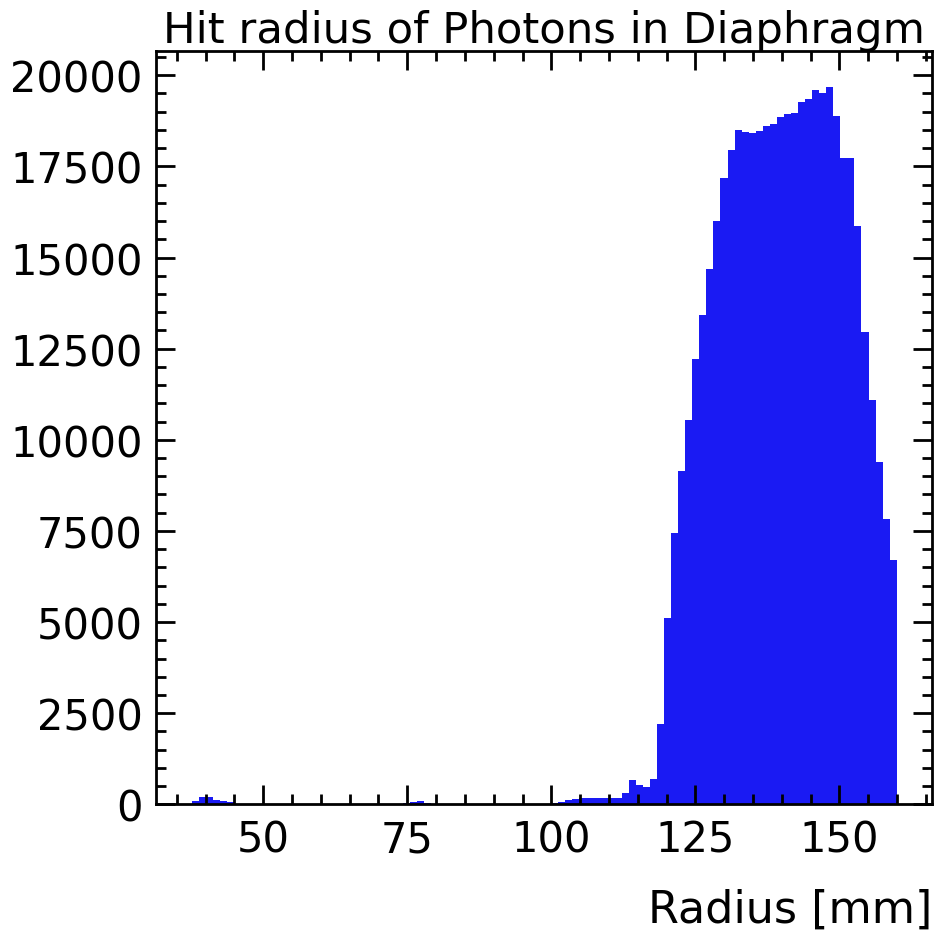

In [76]:
fig105, ax105 = plt.subplots(1, 1, figsize=(10, 10))
ax105.hist(CedarDiaphragm_R, bins=100)
ax105.set_xlabel("Radius [mm]")
ax105.set_title("Hit radius of Photons in Diaphragm")
plt.show()

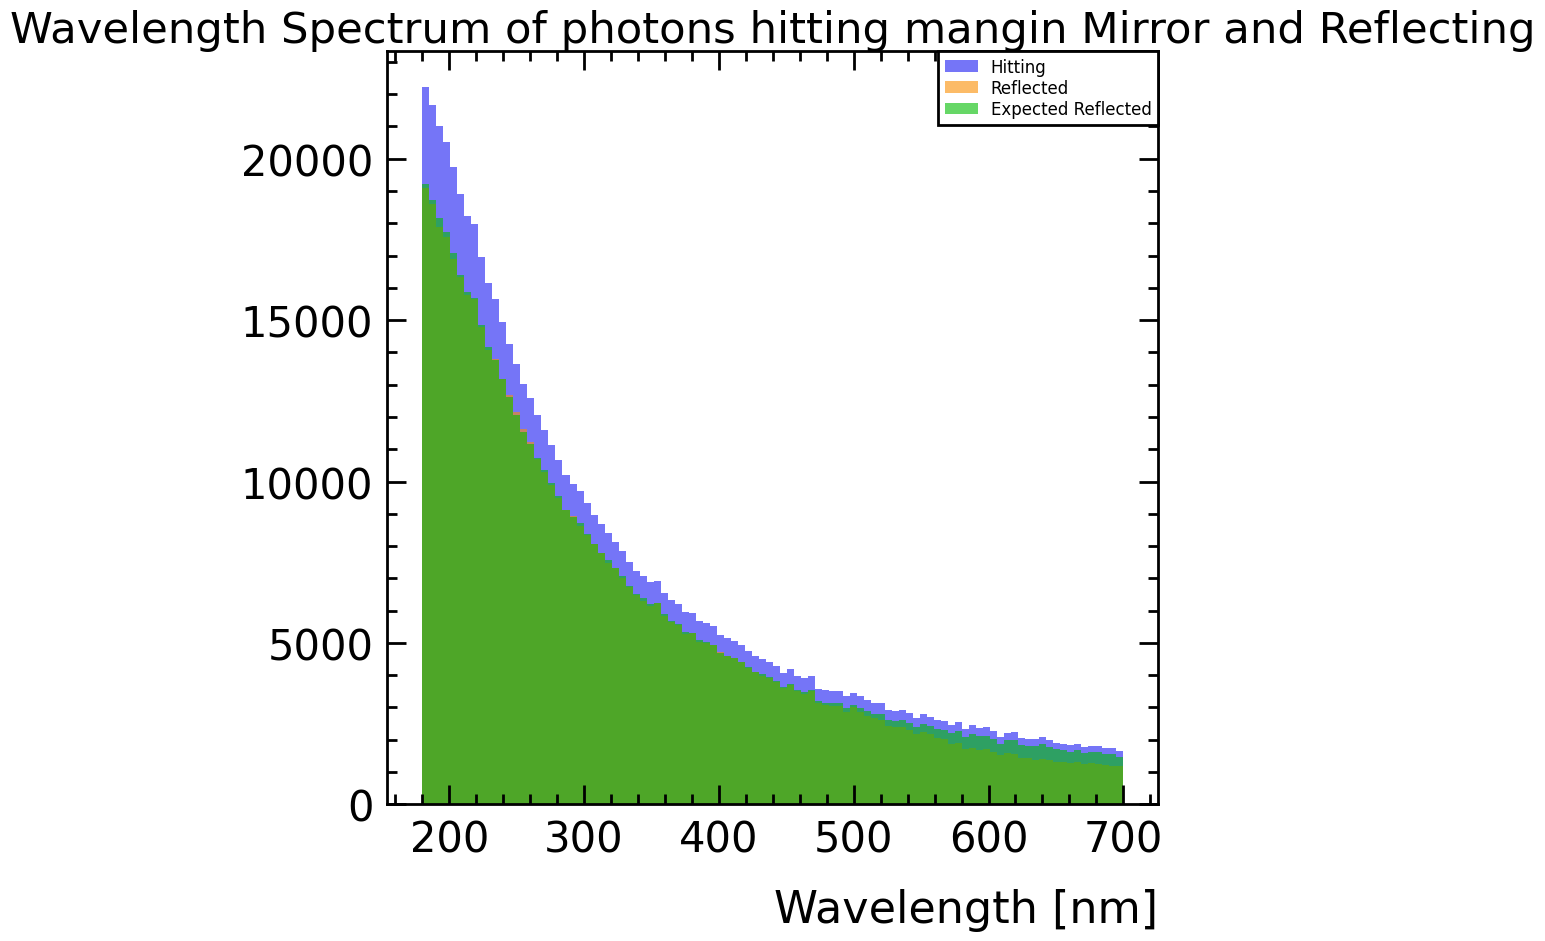

In [71]:
fig01, ax01 = plt.subplots(1, 1, figsize=(10, 10))

counts, bins, bars = ax01.hist(mang_hit_Waves,bins=100,label="Hitting",alpha=0.6)
ax01.hist(mang_ref_Waves,bins=100,label="Reflected",alpha=0.6)
ax01.set_title("Wavelength Spectrum of photons hitting mangin Mirror and Reflecting")

expected = []
wexpected = []
for i in range(len(counts)):
    nocounts = counts[i]*CEDARH.CedarHManginMirrorReflectivity(bins[i])
    for t in range(int(nocounts)):
        expected.append(bins[i])
        
    
ax01.hist(expected,bins=100,label="Expected Reflected",alpha=0.6,range=(min(bins),max(bins)))
ax01.legend()
ax01.set_xlabel("Wavelength [nm]")
plt.show()

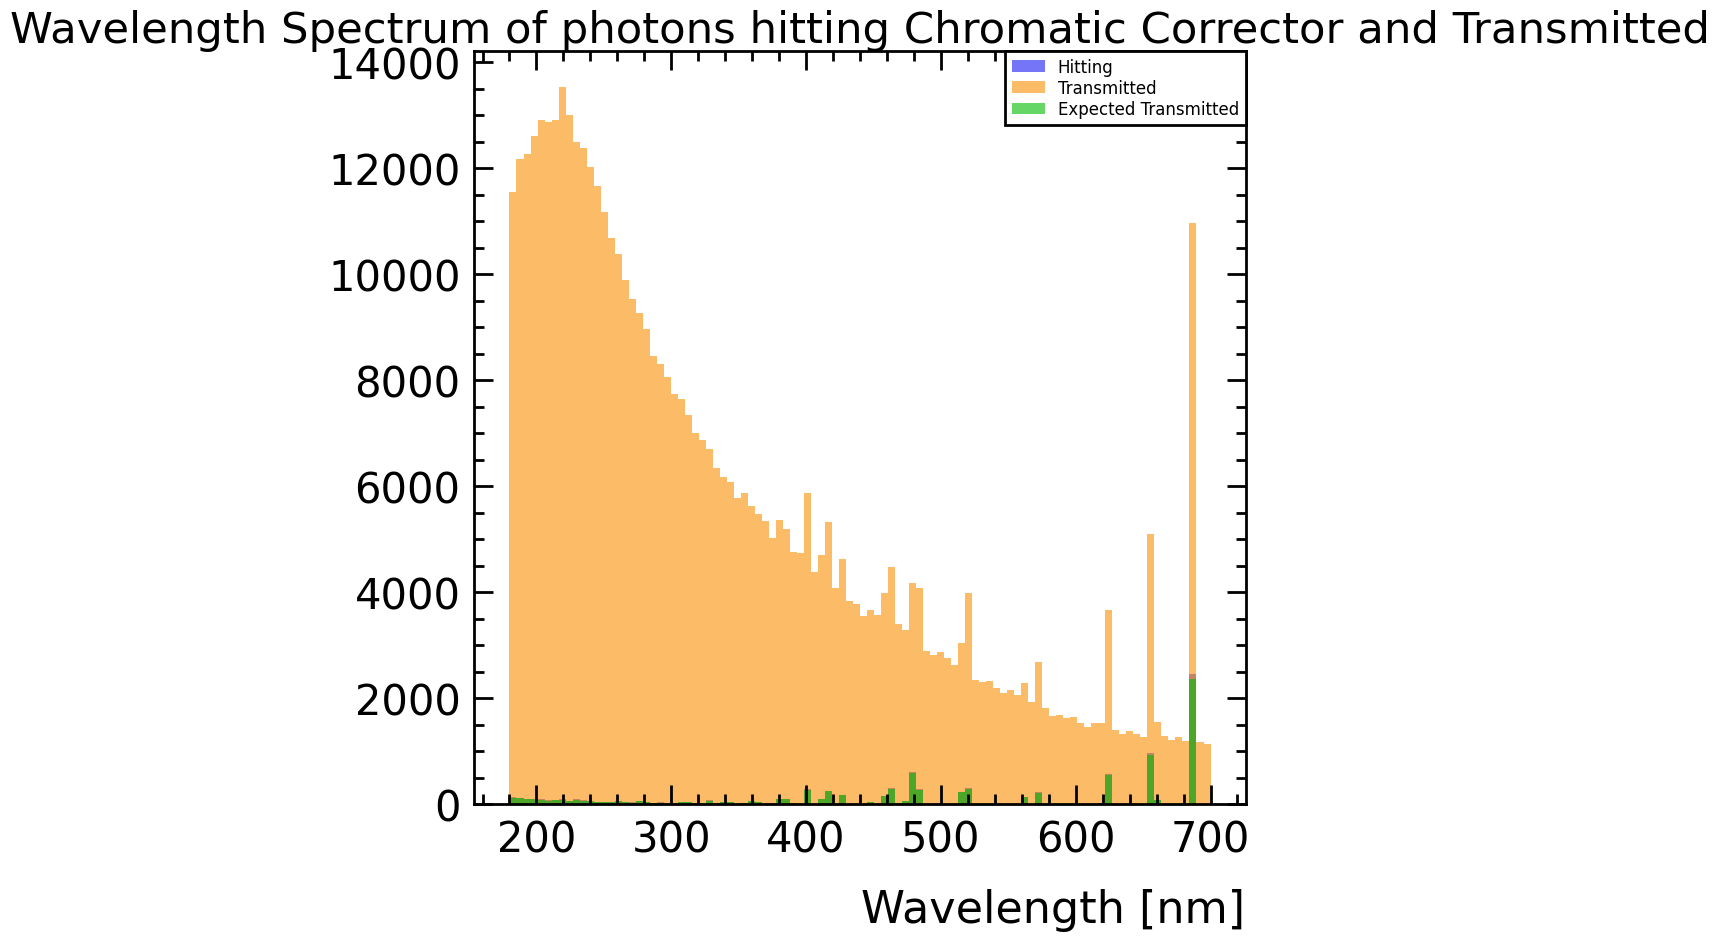

In [70]:
fig02, ax02 = plt.subplots(1, 1, figsize=(10, 10))
counts2, bins2, bars2 = ax02.hist(crom_hit,bins=100,label="Hitting",alpha=0.6)
ax02.hist(crom_trans,bins=100,label="Transmitted",alpha=0.6)

cromexpected = []
for i in range(len(counts2)):
    ncounts = counts2[i]*(1-CEDARH.ChromaticCorrectorReflectivity(bins2[i]))
    for t in range(int(ncounts)):
        cromexpected.append(bins2[i])

ax02.hist(cromexpected,bins=100,label="Expected Transmitted",alpha=0.6,range=(min(bins2),max(bins2)))
ax02.set_title("Wavelength Spectrum of photons hitting Chromatic Corrector and Transmitted")
ax02.legend()
ax02.set_xlabel("Wavelength [nm]")
plt.show()

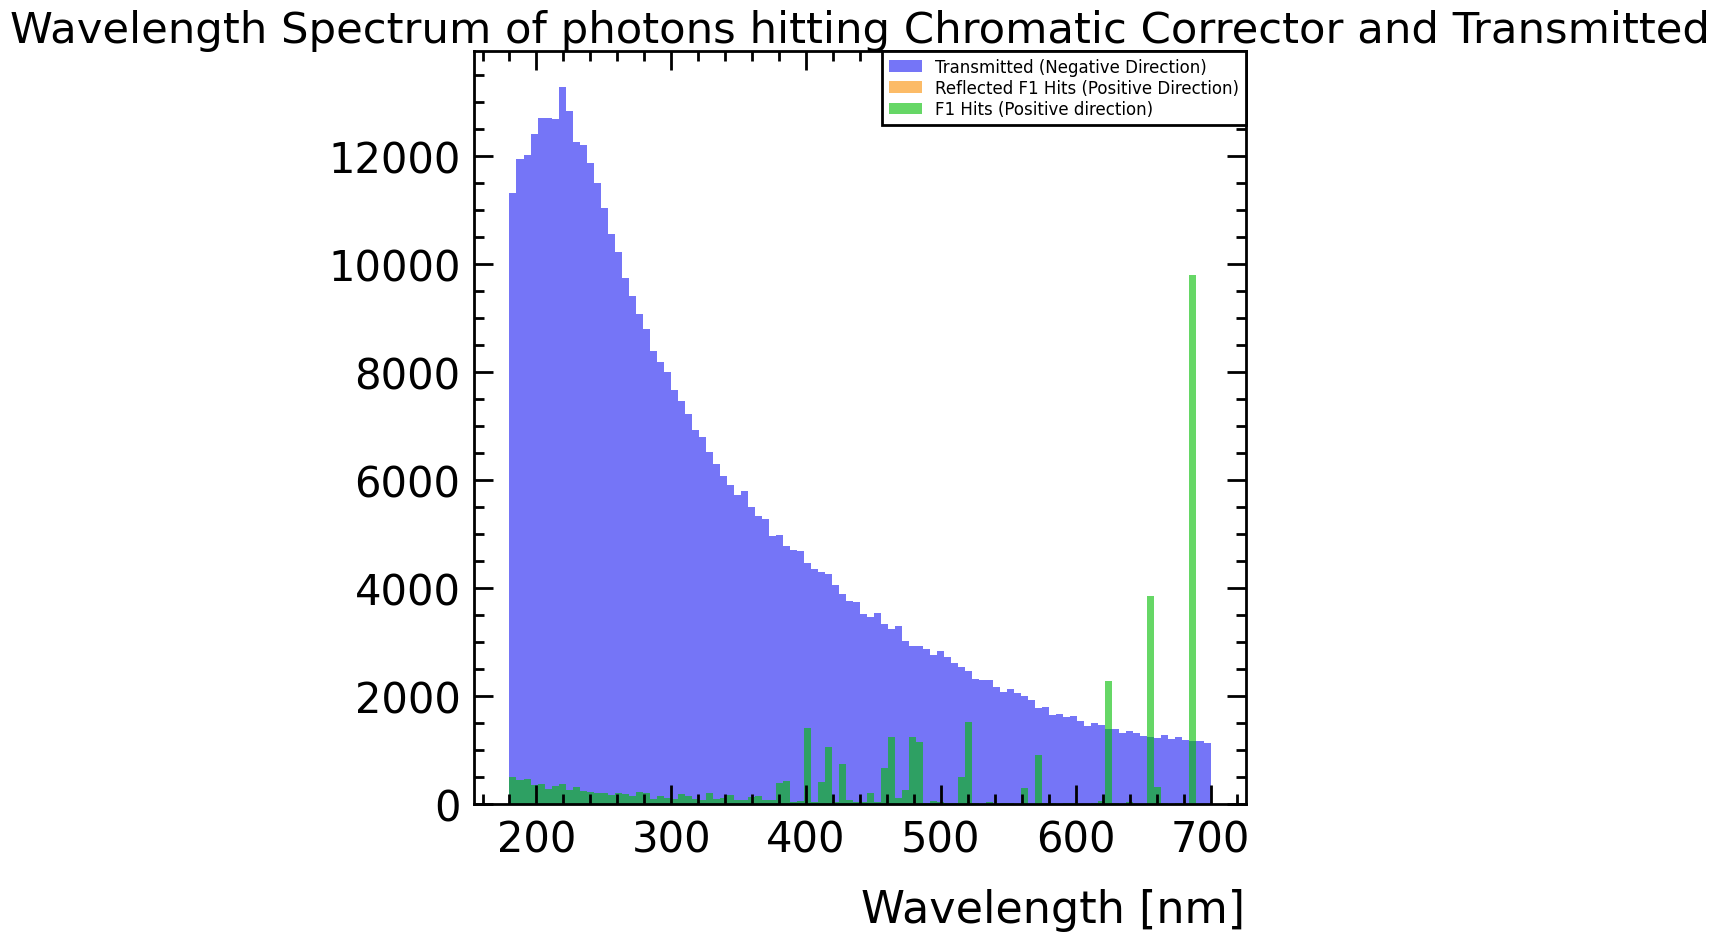

In [69]:
fig02_2, ax02_2 = plt.subplots(1, 1, figsize=(10, 10))
#counts2, bins2, bars2 = ax02_2.hist(crom_F1_hit,bins=100,label="F2 Hits (Negative Direction)",alpha=0.6)
counts2_, bins2_, bars2_ = ax02_2.hist(crom_F1_trans,bins=100,label="Transmitted (Negative Direction)",alpha=0.6)
counts2_r, bins2_r, bars2_r = ax02_2.hist(crom_F1_refl,bins=100,label="Reflected F1 Hits (Positive Direction)",alpha=0.6)

cromexpected = []
for i in range(len(counts2)):
    ncounts = counts2[i]*(1-CEDARH.ChromaticCorrectorF1Reflectivity(bins2[i]))
    for t in range(int(ncounts)):
        cromexpected.append(bins2[i])

counts2_p, bins2_p, bars2_p = ax02_2.hist(crom_F1_for,bins=100,label="F1 Hits (Positive direction)",alpha=0.6,range=(min(bins2),max(bins2)))
#ax02_2.hist(cromexpected,bins=100,label="Expected Transmitted",alpha=0.6,range=(min(bins2),max(bins2)))
ax02_2.set_title("Wavelength Spectrum of photons hitting Chromatic Corrector and Transmitted")
ax02_2.legend()
ax02_2.set_xlabel("Wavelength [nm]")
plt.show()

C:\Users\sande\AppData\Local\Temp\ipykernel_26732\4222043122.py:4: RuntimeWarning: invalid value encountered in divide
  error_val = change*np.sqrt((np.sqrt(counts2_r)/counts2_r)**2 + (np.sqrt(counts2_p)/counts2_p)**2)
C:\Users\sande\AppData\Local\Temp\ipykernel_26732\4222043122.py:8: RuntimeWarning: divide by zero encountered in divide
  ax02_3.plot(bins2[:-1],1/change)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


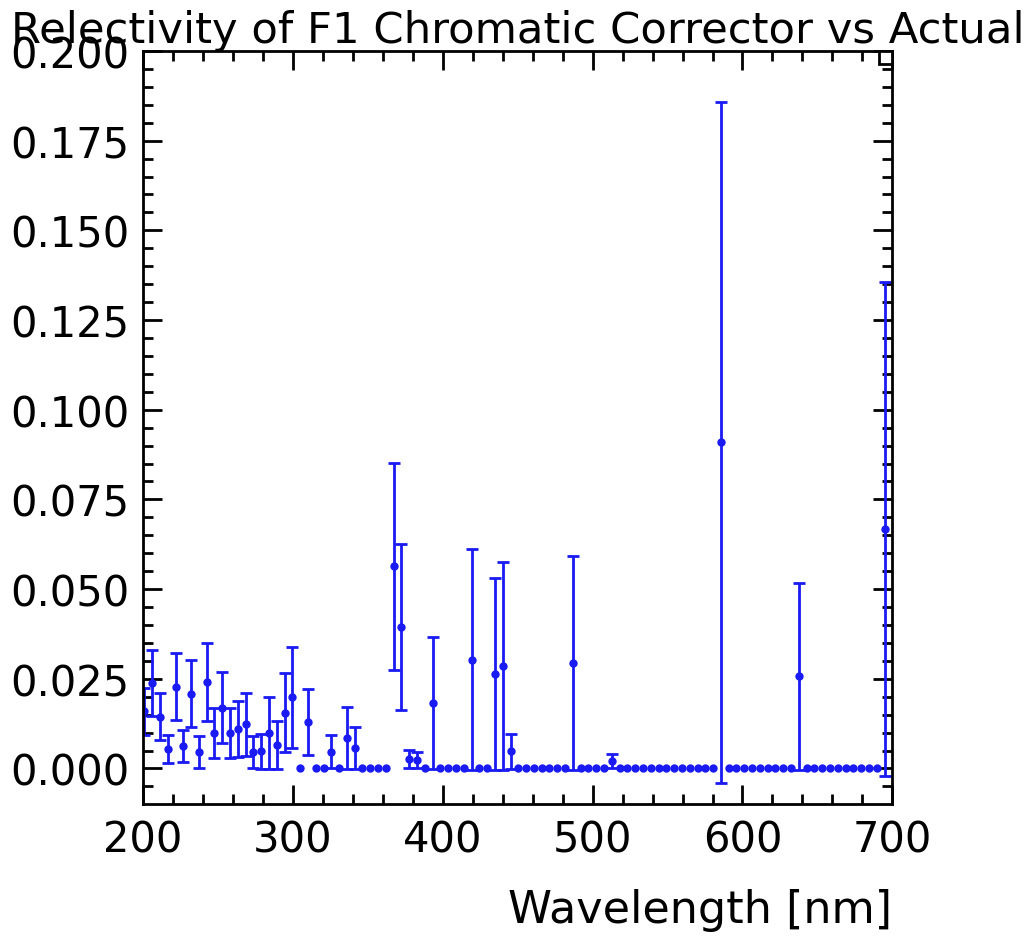

In [68]:
change = counts2_r/counts2_p
fig02_3, ax02_3 = plt.subplots(1, 1, figsize=(10, 10))

error_val = change*np.sqrt((np.sqrt(counts2_r)/counts2_r)**2 + (np.sqrt(counts2_p)/counts2_p)**2)    

ax02_3.errorbar(bins2[:-1],change,yerr=error_val,linestyle='')

ax02_3.plot(bins2[:-1],1/change)

ax02_3.set_title("Relectivity of F1 Chromatic Corrector vs Actual")
ax02_3.set_xlim(200,700)
ax02_3.set_ylim(-0.01,0.2)
ax02_3.legend()
ax02_3.set_xlabel("Wavelength [nm]")
plt.show()

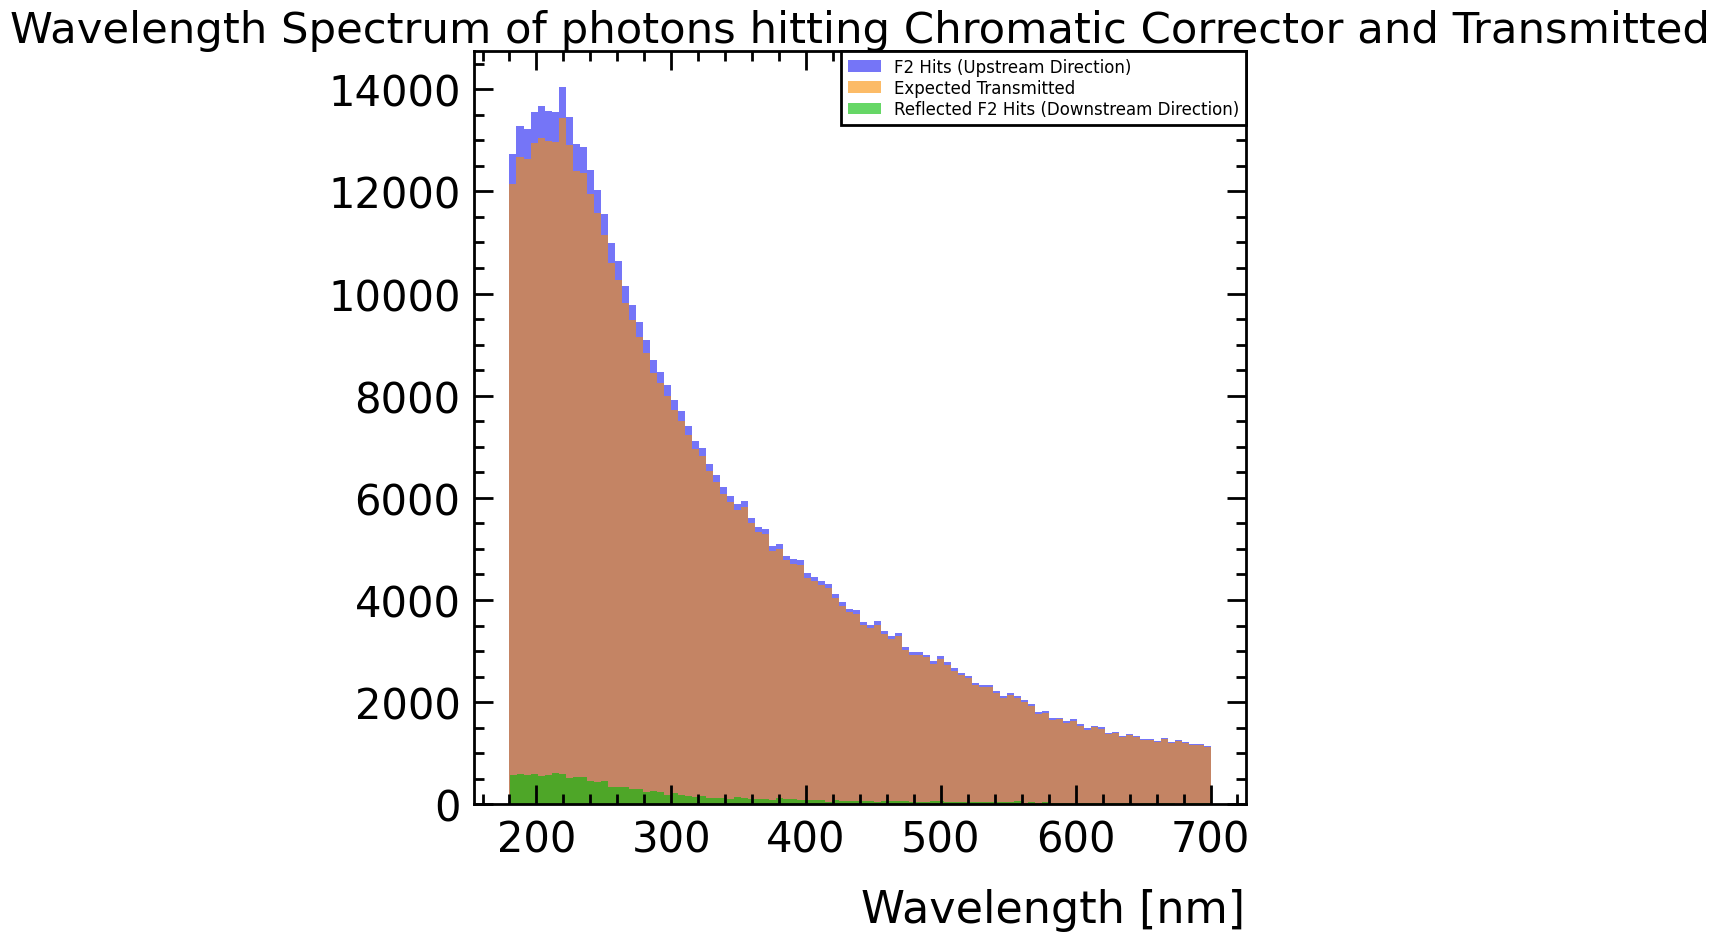

In [65]:
fig02_4, ax02_4 = plt.subplots(1, 1, figsize=(10, 10))
counts4, bins4, bars4 = ax02_4.hist(crom_F2_hit,bins=100,label="F2 Hits (Upstream Direction)",alpha=0.6)


cromexpected = []
for i in range(len(counts4)):
    ncounts = counts4[i]*(1-CEDARH.ChromaticCorrectorF2Reflectivity(bins4[i]))
    for t in range(int(ncounts)):
        cromexpected.append(bins4[i])

ax02_4.hist(cromexpected,bins=100,label="Expected Transmitted",alpha=0.6,range=(min(bins4),max(bins4)))
counts4_r, bins4_r, bars4_r = ax02_4.hist(crom_F2_refl,bins=100,label="Reflected F2 Hits (Downstream Direction)",alpha=0.6)
ax02_4.set_title("Wavelength Spectrum of photons hitting Chromatic Corrector and Transmitted")
ax02_4.set_xlabel("Wavelength [nm]")
ax02_4.legend()
plt.show()

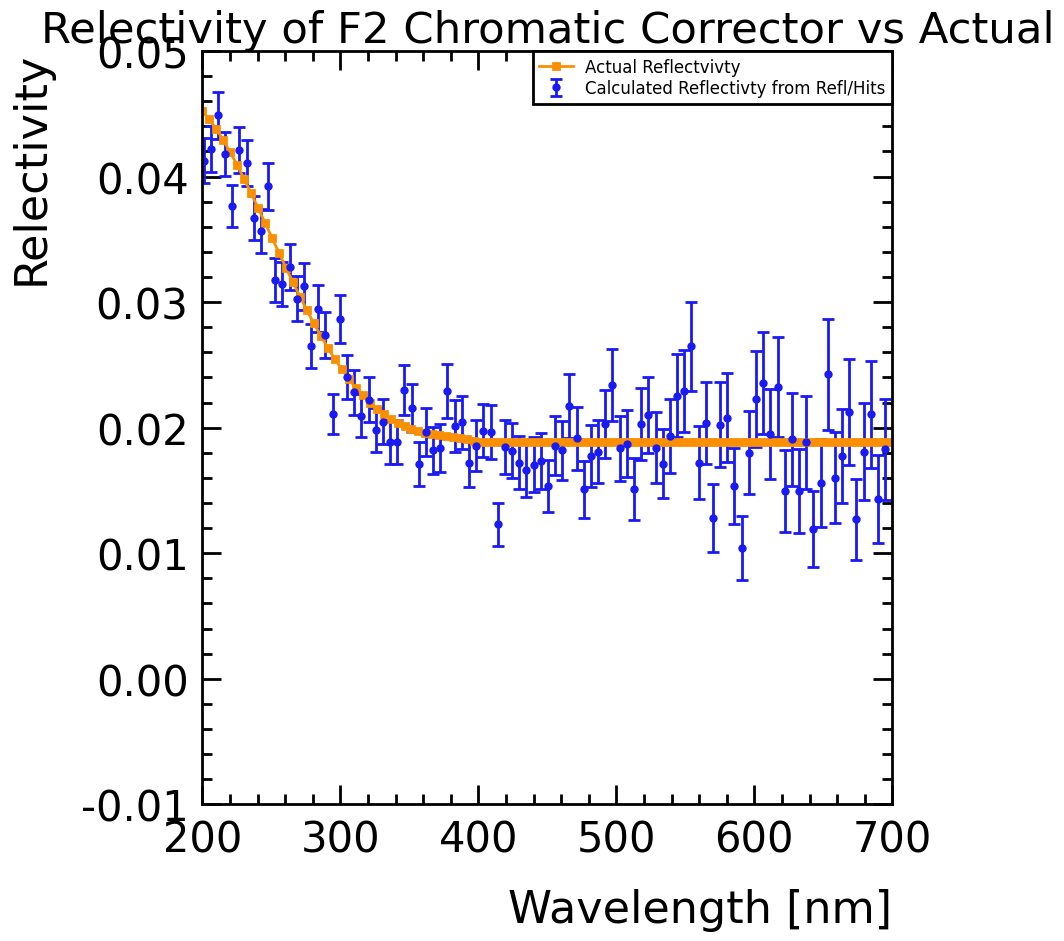

In [57]:
change = counts4_r/counts4
fig02_3, ax02_3 = plt.subplots(1, 1, figsize=(10, 10))

error_val = change*np.sqrt((np.sqrt(counts4)/counts4)**2 + (np.sqrt(counts4_r)/counts4_r)**2)    

ax02_3.errorbar(bins4[:-1],change,yerr=error_val,linestyle='',label="Calculated Reflectivty from Refl/Hits")

wave = np.linspace(200,700,100)
expected = []
for val in wave:
    expected.append(CEDARH.ChromaticCorrectorF2Reflectivity(val))

ax02_3.plot(wave,expected,label="Actual Reflectvivty")

ax02_3.set_title("Relectivity of F2 Chromatic Corrector vs Actual")
ax02_3.set_xlim(200,700)
ax02_3.set_ylim(-0.01,0.05)
ax02_3.set_ylabel("Relectivity")
ax02_3.set_xlabel("Wavelength [nm]")
ax02_3.legend()
plt.show()

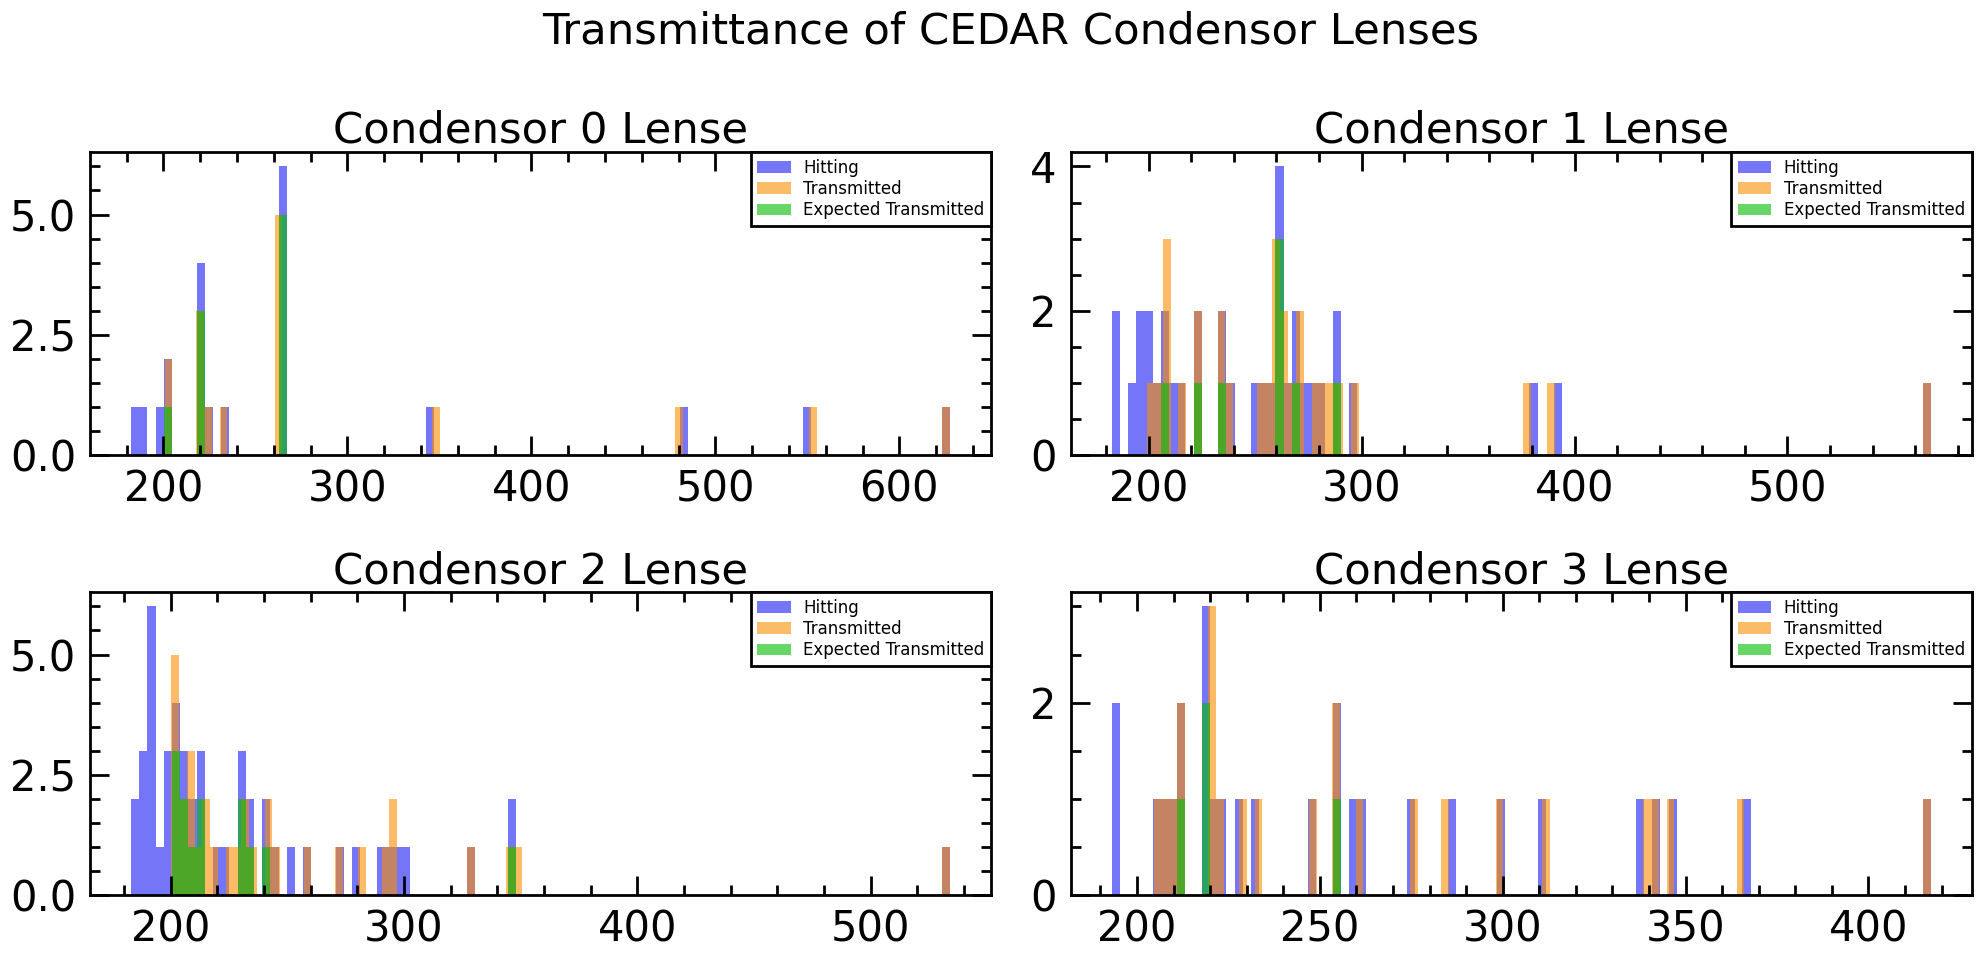

In [59]:
fig03, ax03 = plt.subplots(2, 2, figsize=(20, 10))
fig03.suptitle("Transmittance of CEDAR Condensor Lenses")
row = 0
for p in range(4):
    col = p%2
    axis = ax03[row,col]
    if p%2 == 1:
        row += 1
    counts3, bins3 , bars3 = axis.hist(condensor_hit[p],bins=100,label="Hitting",alpha=0.6)
    axis.hist(condensor_trans[p],bins=100,label="Transmitted",alpha=0.6)

    condexpected = []
    for i in range(len(counts3)):
        condcounts = counts3[i]*(CEDARH.CondenserCEDARHTransmittance(p,bins3[i]))
        for t in range(int(condcounts)):
            condexpected.append(bins3[i])

    axis.hist(condexpected,bins=100,label="Expected Transmitted",alpha=0.6,range=(min(bins3),max(bins3)))
    axis.set_title("Condensor {} Lense".format(p))
    axis.legend()
plt.show()

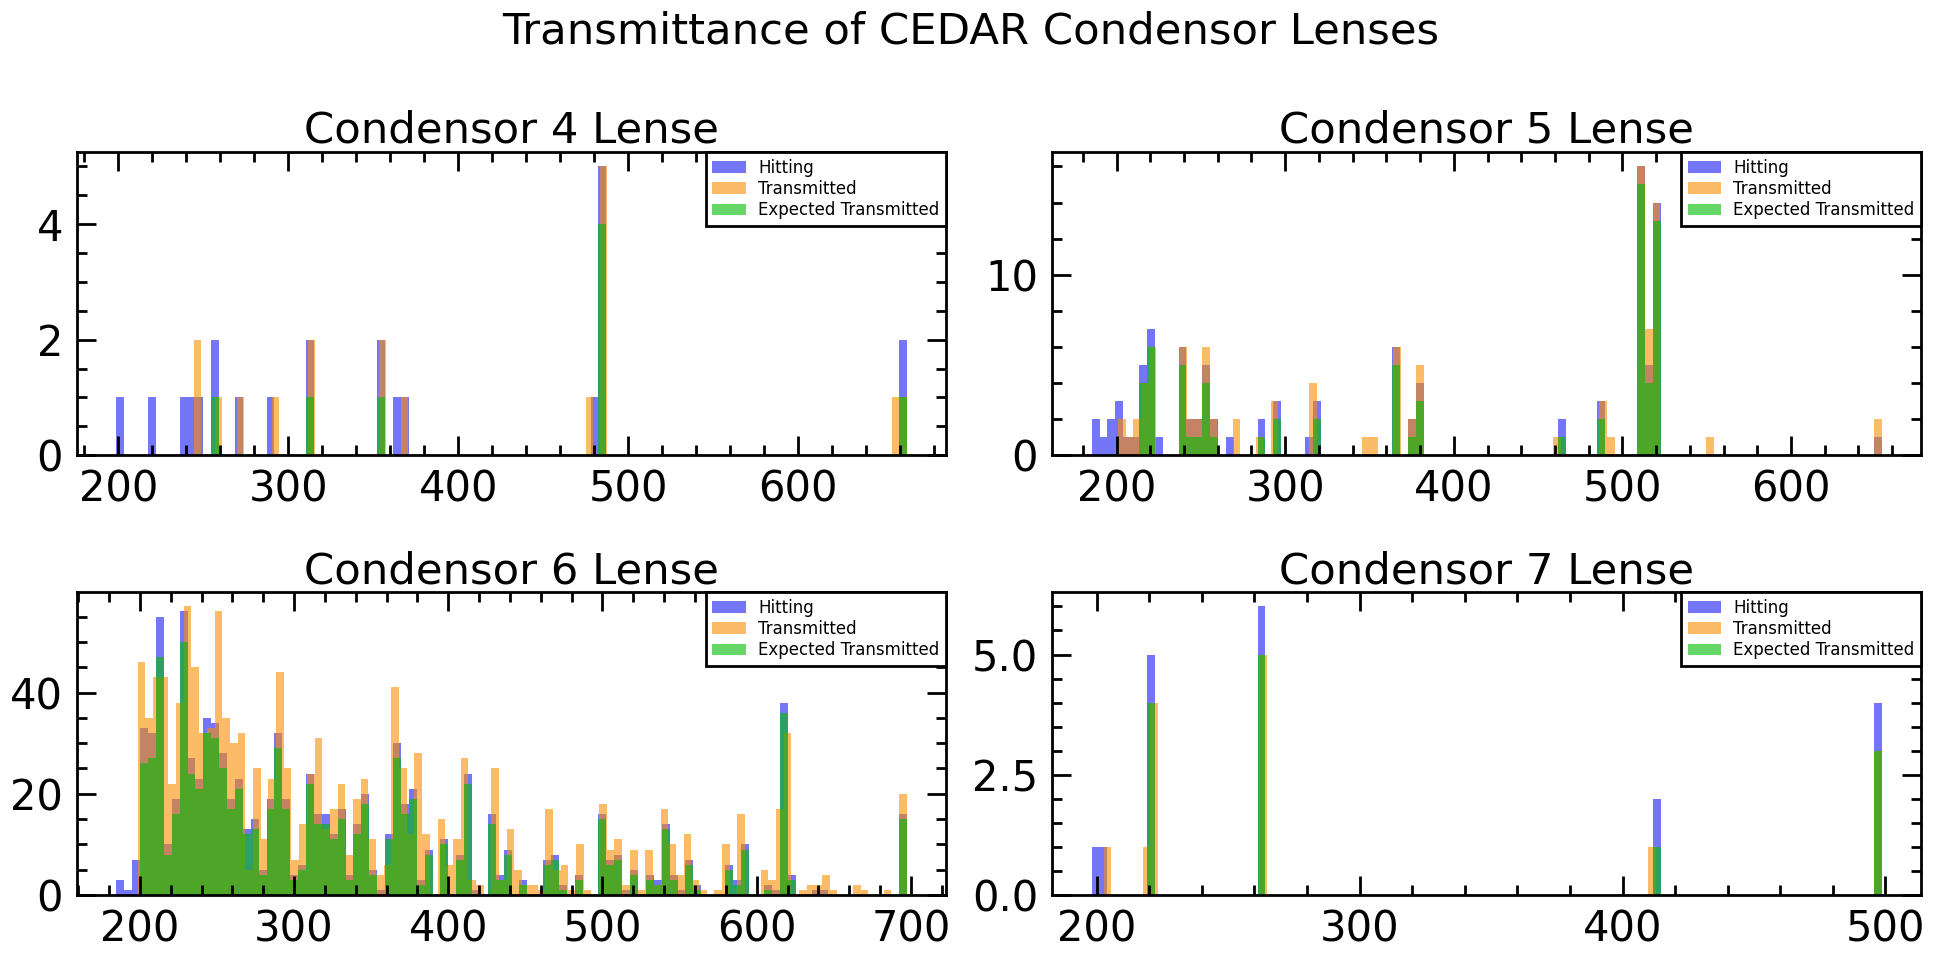

In [60]:
fig03_1, ax03_1 = plt.subplots(2, 2, figsize=(20, 10))
fig03_1.suptitle("Transmittance of CEDAR Condensor Lenses")
row = 0
for p in range(4,8):
    col = p%2
    axis = ax03_1[row,col]
    if p%2 == 1:
        row += 1
    counts3, bins3 , bars3 = axis.hist(condensor_hit[p],bins=100,label="Hitting",alpha=0.6)
    axis.hist(condensor_trans[p],bins=100,label="Transmitted",alpha=0.6)

    condexpected = []
    for i in range(len(counts3)):
        condcounts = counts3[i]*(CEDARH.CondenserCEDARHTransmittance(p,bins3[i]))
        for t in range(int(condcounts)):
            condexpected.append(bins3[i])

    axis.hist(condexpected,bins=100,label="Expected Transmitted",alpha=0.6,range=(min(bins3),max(bins3)))
    axis.set_title("Condensor {} Lense".format(p))
    axis.legend()

plt.show()

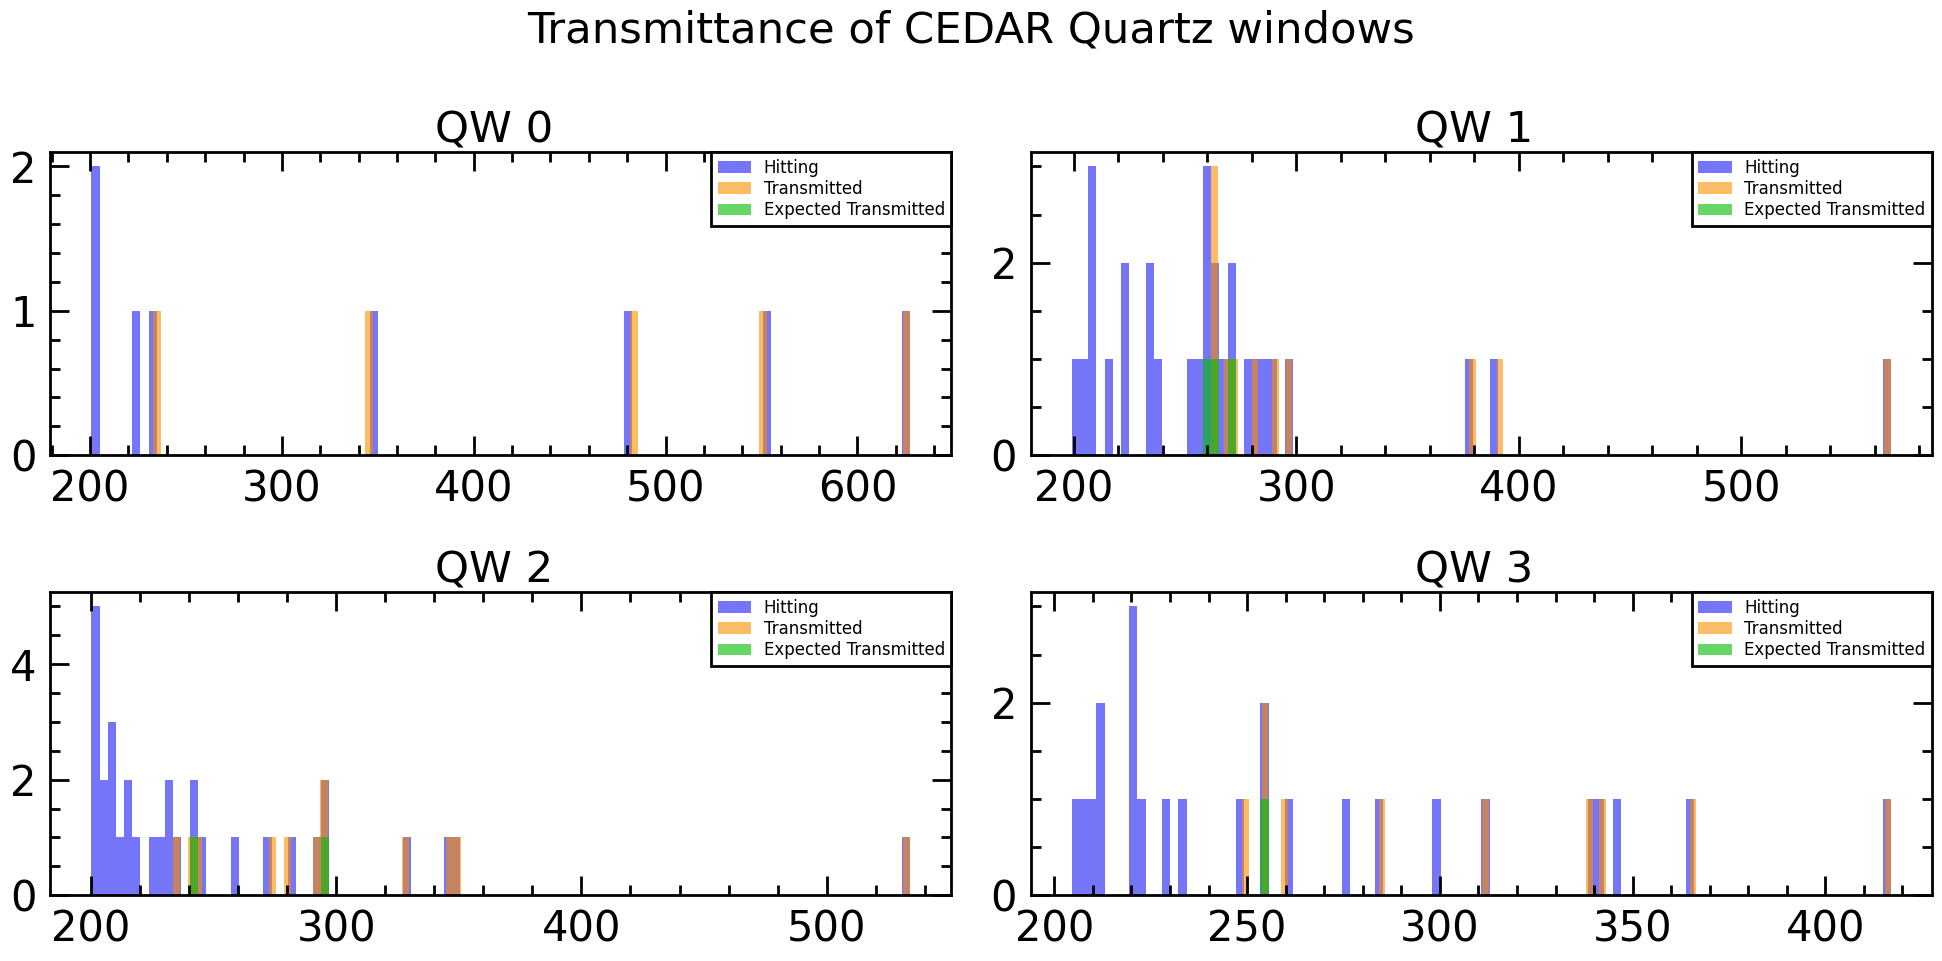

In [61]:
fig04, ax04 = plt.subplots(2, 2, figsize=(20, 10))
fig04.suptitle("Transmittance of CEDAR Quartz windows")
row1 = 0
for p in range(4):
    col1 = p%2
    axis1 = ax04[row1,col1]
    if p%2 == 1:
        row1 += 1
    counts4, bins4, bars4 = axis1.hist(QW_hit[p],bins=100,label="Hitting",alpha=0.6)
    axis1.hist(QW_Trans[p],bins=100,label="Transmitted",alpha=0.6)

    QWexpected = []
    for i in range(len(counts4)):
        qwcounts = counts4[i]*(CEDARH.QuartzWindowCEDARHTransmittance(p,bins4[i]))
        for t in range(int(qwcounts)):
            QWexpected.append(bins4[i])

    counts4_, bins4_, bars4_ = axis1.hist(QWexpected,bins=100,label="Expected Transmitted",alpha=0.6,range=(min(bins4),max(bins4)))
    axis1.set_title("QW {} ".format(p))
    axis1.legend()
plt.show()

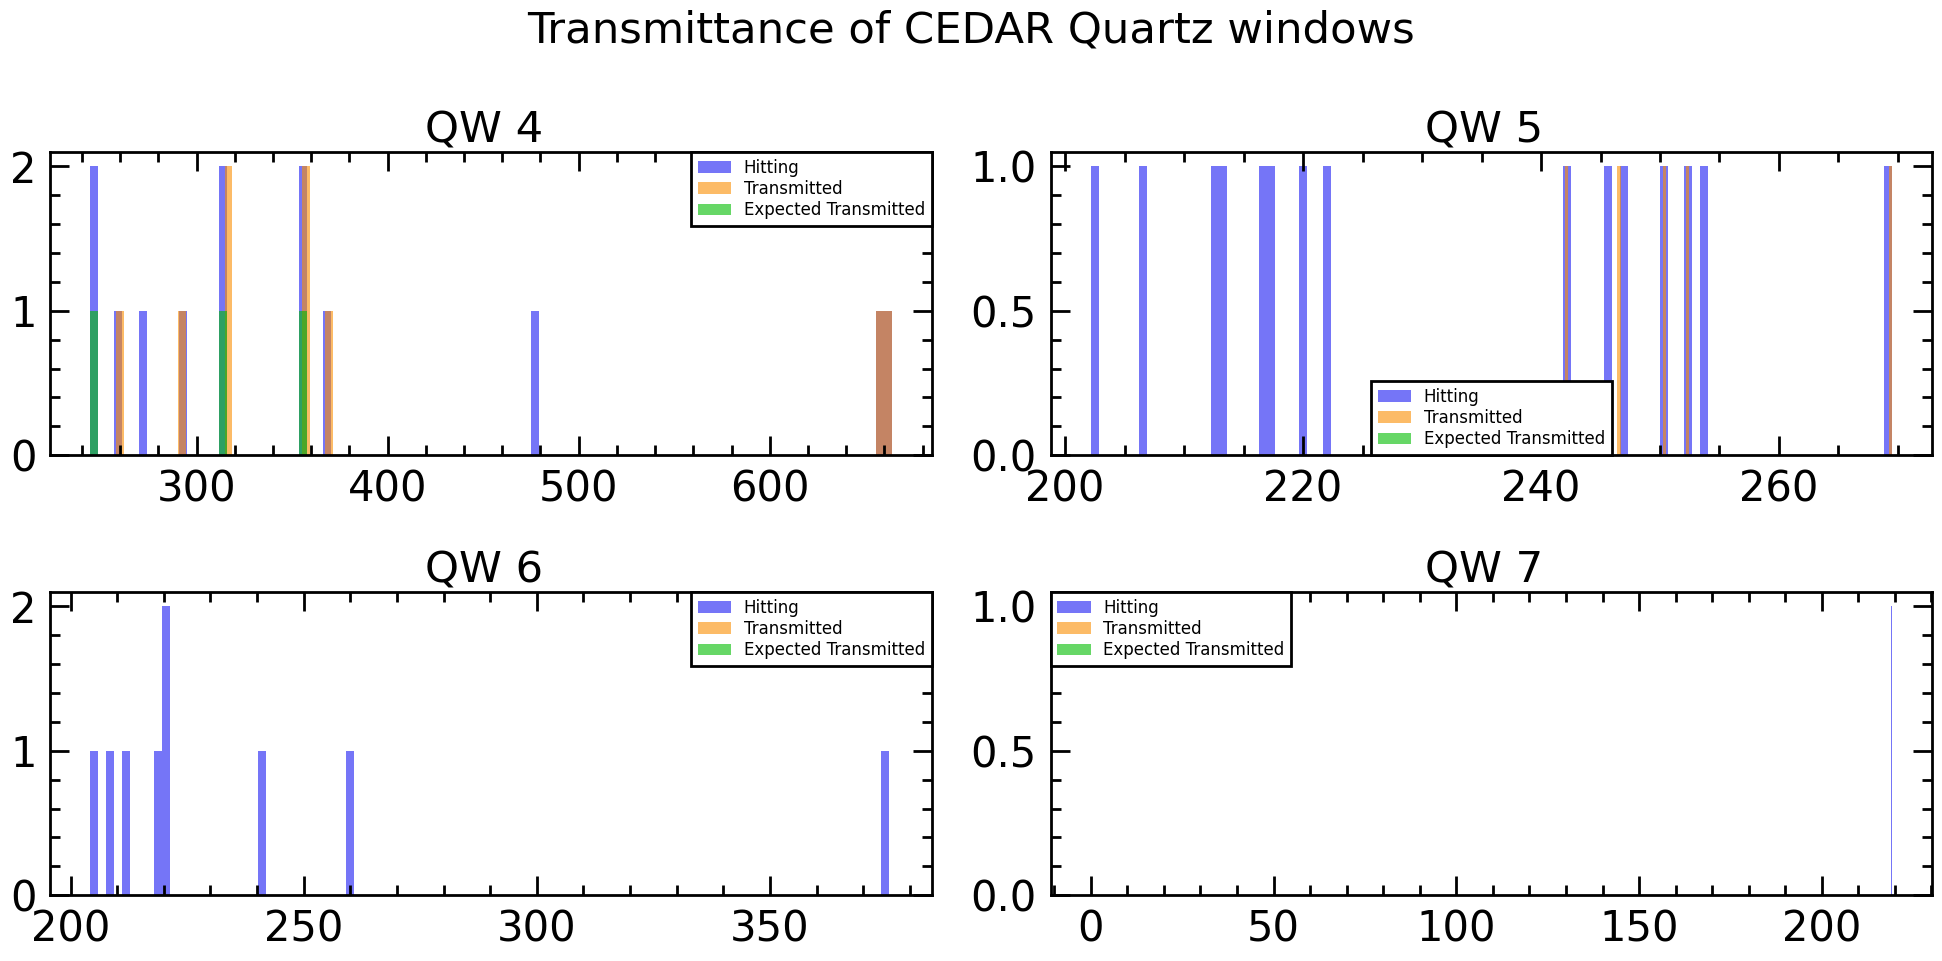

In [62]:
fig04_1, ax04_1 = plt.subplots(2, 2, figsize=(20, 10))
fig04_1.suptitle("Transmittance of CEDAR Quartz windows")
row1 = 0
for p in range(4,8):
    col1 = p%2
    axis1 = ax04_1[row1,col1]
    if p%2 == 1:
        row1 += 1
    counts4, bins4, bars4 = axis1.hist(QW_hit[p],bins=100,label="Hitting",alpha=0.6)
    axis1.hist(QW_Trans[p],bins=100,label="Transmitted",alpha=0.6)

    QWexpected = []
    for i in range(len(counts4)):
        qwcounts = counts4[i]*(CEDARH.QuartzWindowCEDARHTransmittance(p,bins4[i]))
        for t in range(int(qwcounts)):
            QWexpected.append(bins4[i])

    counts4_, bins4_, bars4_ = axis1.hist(QWexpected,bins=100,label="Expected Transmitted",alpha=0.6,range=(min(bins4),max(bins4)))
    axis1.set_title("QW {} ".format(p))
    axis1.legend()
plt.show()

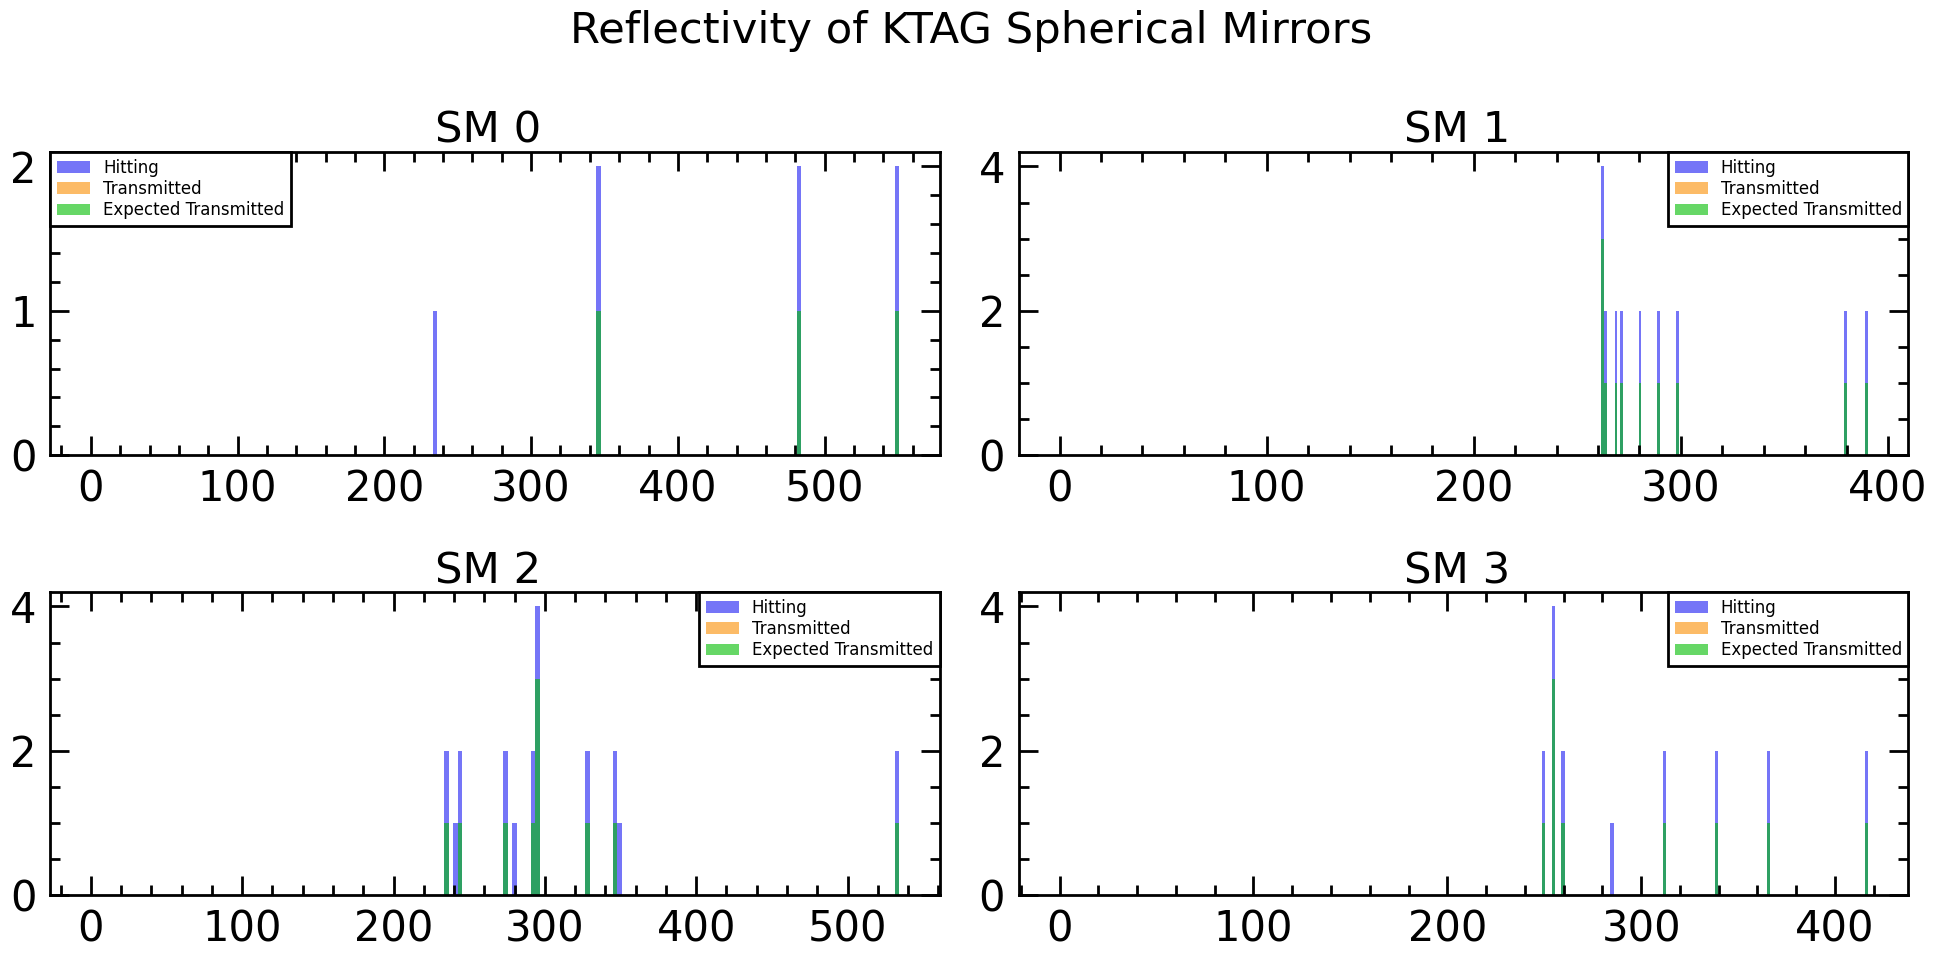

In [63]:
fig05, ax05 = plt.subplots(2, 2, figsize=(20, 10))
fig05.suptitle("Reflectivity of KTAG Spherical Mirrors")
row1 = 0
for p in range(4):
    col1 = p%2
    axis1 = ax05[row1,col1]
    if p%2 == 1:
        row1 += 1
    counts4, bins4, bars4 = axis1.hist(SM_hit[p],bins=100,label="Hitting",alpha=0.6)
    axis1.hist(SM_Trans[p],bins=100,label="Transmitted",alpha=0.6)

    SMexpected = []
    for i in range(len(counts4)):
        qwcounts = counts4[i]*(CEDARH.CedarHSphericalMirrorReflectivity(p,bins4[i]))
        for t in range(int(qwcounts)):
            SMexpected.append(bins4[i])

    counts4_, bins4_, bars4_ = axis1.hist(SMexpected,bins=100,label="Expected Transmitted",alpha=0.6,range=(min(bins4),max(bins4)))
    axis1.set_title("SM {} ".format(p))
    axis1.legend()

plt.show()

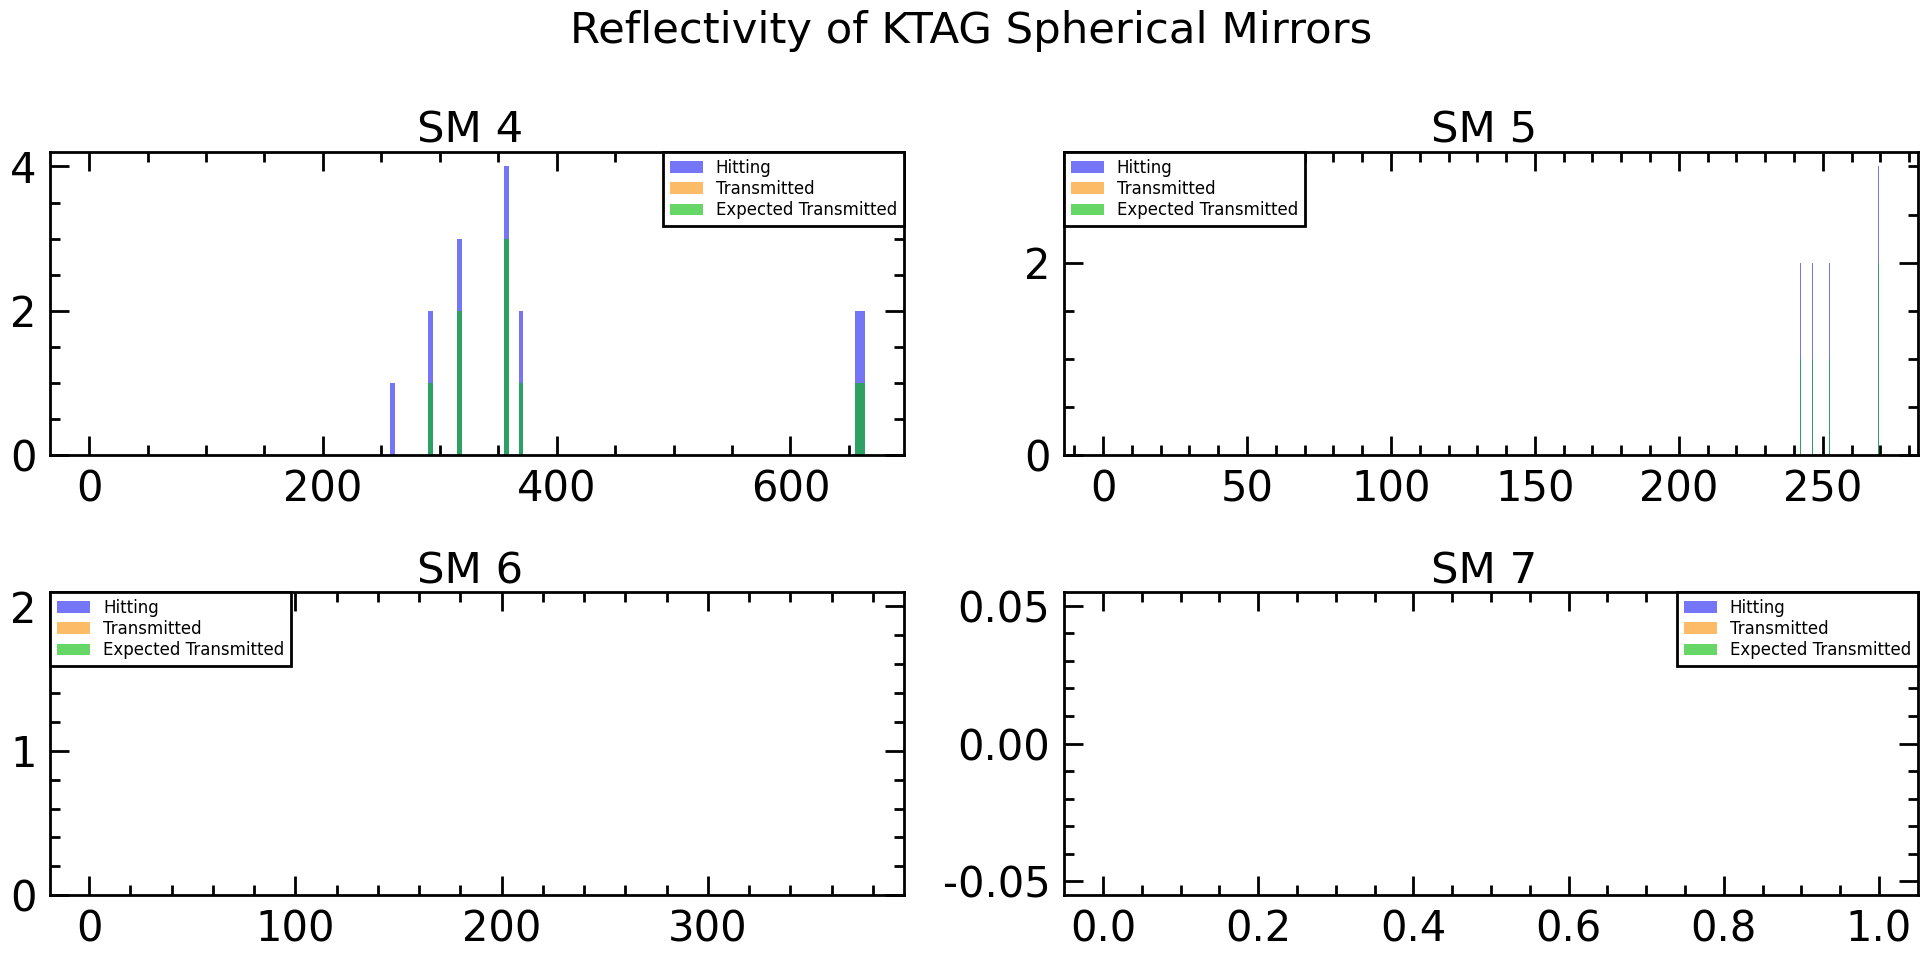

In [64]:
fig05_1, ax05_1 = plt.subplots(2, 2, figsize=(20, 10))
fig05_1.suptitle("Reflectivity of KTAG Spherical Mirrors")
row1 = 0
for p in range(4,8):
    col1 = p%2
    axis1 = ax05_1[row1,col1]
    if p%2 == 1:
        row1 += 1
    counts4, bins4, bars4 = axis1.hist(SM_hit[p],bins=100,label="Hitting",alpha=0.6)
    axis1.hist(SM_Trans[p],bins=100,label="Transmitted",alpha=0.6)

    SMexpected = []
    for i in range(len(counts4)):
        qwcounts = counts4[i]*(CEDARH.CedarHSphericalMirrorReflectivity(p,bins4[i]))
        for t in range(int(qwcounts)):
            SMexpected.append(bins4[i])

    counts4_, bins4_, bars4_ = axis1.hist(SMexpected,bins=100,label="Expected Transmitted",alpha=0.6,range=(min(bins4),max(bins4)))
    axis1.set_title("SM {} ".format(p))
    axis1.legend()
plt.show()